# Bama and Dikwa

In [209]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [280]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from src.datasources import codab, chirps, floodscan
from src.constants import *

In [250]:
ADM2_PCODES = [BAMA, DIKWA, NGALA]

In [252]:
# codab.download_codab_to_blob()

In [288]:
adm = codab.load_codab_from_blob(admin_level=2)
adm_borno = adm[adm["ADM1_PCODE"] == BORNO]
adm_aoi = adm[adm["ADM2_PCODE"].isin(ADM2_PCODES)]

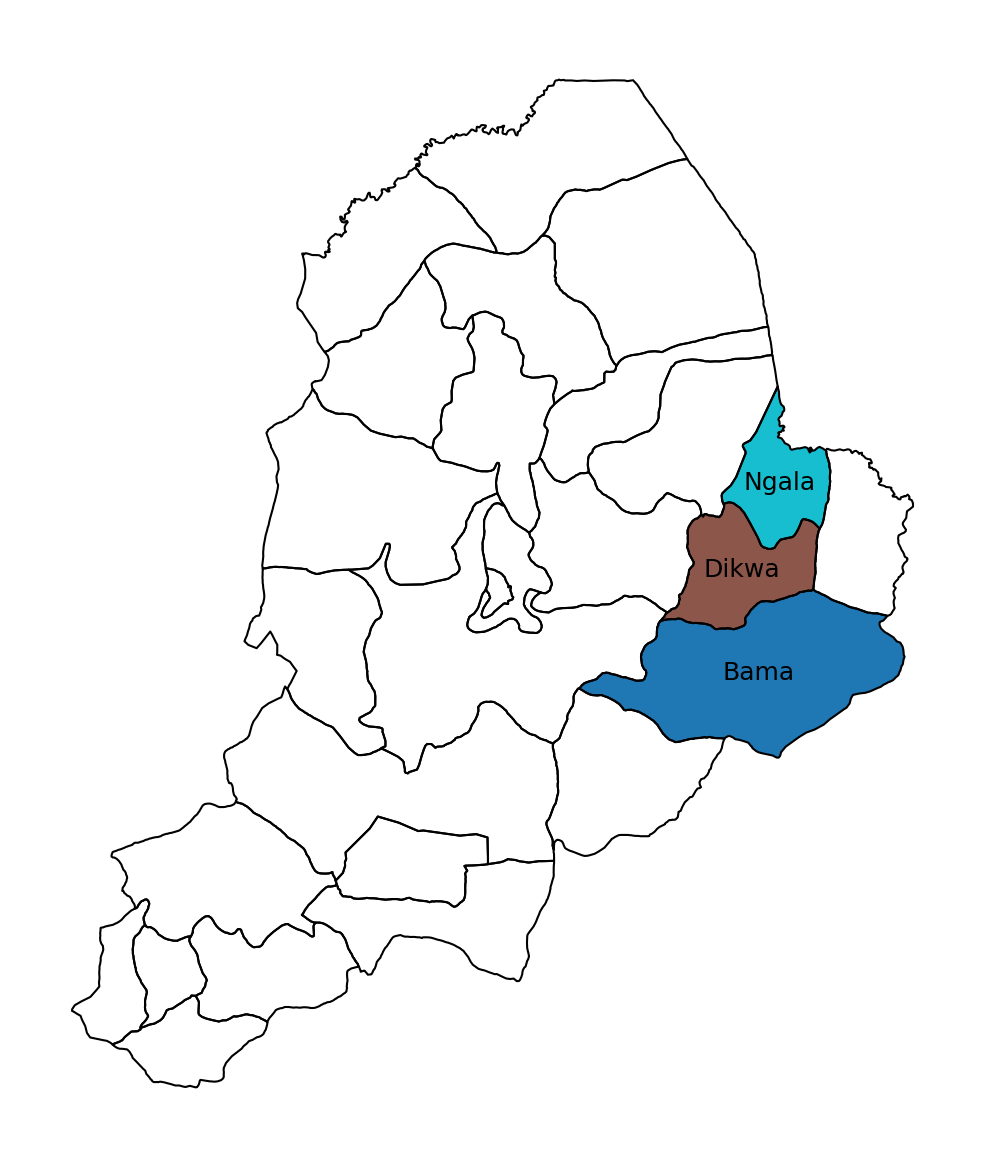

In [298]:
fig, ax = plt.subplots(dpi=300)
adm_aoi.plot(column="ADM2_PCODE", ax=ax)
adm_borno.boundary.plot(ax=ax, linewidth=0.5, color="k")
ax.axis("off")
for _, row in adm_aoi.iterrows():
    ax.annotate(
        row["ADM2_EN"],
        (row.geometry.centroid.x, row.geometry.centroid.y),
        ha="center",
        va="center",
        fontsize=6,
    )

In [255]:
fs = floodscan.load_adm2_daily_rasterstats()
fs = fs[fs["ADM2_PCODE"].isin(ADM2_PCODES)]
rolls = [1, 3, 5, 7, 9, 11]
for roll in rolls:
    fs[f"fs_roll{roll}"] = (
        fs.groupby("ADM2_PCODE")["SFED_AREA"]
        .transform(lambda x: x.rolling(window=roll, min_periods=roll).mean())
        .shift(-np.floor(roll / 2).astype(int))
    )

In [256]:
fs

,time,SFED_AREA,ADM2_PCODE,fs_roll1,fs_roll3,fs_roll5,fs_roll7,fs_roll9,fs_roll11
208670,1998-01-12,0.000000,NG008003,0.000000,NaN,NaN,NaN,NaN,NaN
208671,1998-01-13,0.000000,NG008003,0.000000,0.000000,NaN,NaN,NaN,NaN
208672,1998-01-14,0.000000,NG008003,0.000000,0.000000,0.000000,NaN,NaN,NaN
208673,1998-01-15,0.000000,NG008003,0.000000,0.000000,0.000000,0.000000,NaN,NaN
208674,1998-01-16,0.000000,NG008003,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
426820,2023-12-27,0.001069,NG008025,0.001069,0.001602,0.001504,0.001349,0.001252,NaN
426821,2023-12-28,0.002588,NG008025,0.002588,0.001692,0.001269,0.001108,NaN,NaN
426822,2023-12-29,0.001419,NG008025,0.001419,0.001375,0.001063,NaN,NaN,NaN
426823,2023-12-30,0.000119,NG008025,0.000119,0.000552,NaN,NaN,NaN,NaN


In [257]:
exposure = floodscan.load_adm2_flood_exposures()
exposure = exposure[exposure["ADM2_PCODE"].isin(ADM2_PCODES)]

In [258]:
ch = chirps.load_raster_stats()
ch = ch[ch["ADM2_PCODE"].isin(ADM2_PCODES)]

ch = ch.rename(columns={"T": "time"})
ch = ch.sort_values("time")

rolls = [1, 2, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
for roll in rolls:
    ch[f"ch_roll{roll}"] = ch.groupby("ADM2_PCODE")["mean"].transform(
        lambda x: x.rolling(window=roll, min_periods=roll).sum()
    )

In [301]:
ch

,time,mean,ADM2_PCODE,ch_roll1,ch_roll2,ch_roll3,ch_roll5,ch_roll10,ch_roll15,ch_roll20,ch_roll25,ch_roll30,ch_roll35,ch_roll40,ch_roll45,ch_roll50,ch_roll55,ch_roll60
218408,1998-01-01,0.0,NG008003,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427320,1998-01-01,0.0,NG008025,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265888,1998-01-01,0.0,NG008008,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218409,1998-01-02,0.0,NG008003,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427321,1998-01-02,0.0,NG008025,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227902,2023-12-30,0.0,NG008003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000104,0.000722,0.000722,0.000722,0.000722,0.024661,0.031666,0.197326
275382,2023-12-30,0.0,NG008008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001012,0.005146,0.005146,0.005146,0.005146,0.005146,0.034694,0.231175
275383,2023-12-31,0.0,NG008008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001012,0.005146,0.005146,0.005146,0.005146,0.005146,0.034694,0.050848
227903,2023-12-31,0.0,NG008003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000104,0.000722,0.000722,0.000722,0.000722,0.024460,0.031666,0.122183


## Plot CHIRPS return period

165.36772204999997
Bama


,Year,Trigger Date
0,1998,1998-08-28
1,1999,1999-08-01
2,2000,2000-07-31
3,2003,2003-09-01
4,2007,2007-07-28
5,2008,2008-08-19
6,2020,2020-08-29
7,2022,2022-08-21


253.6894758292308
Dikwa


,Year,Trigger Date
0,1998,1998-08-28
1,1999,1999-08-02
2,2003,2003-08-24
3,2006,2006-08-08
4,2007,2007-07-30
5,2008,2008-08-06
6,2020,2020-08-31
7,2022,2022-08-24


143.66903542461537
Ngala


,Year,Trigger Date
0,1999,1999-08-07
1,2000,2000-07-28
2,2003,2003-08-28
3,2007,2007-07-29
4,2018,2018-08-28
5,2019,2019-08-29
6,2020,2020-09-01
7,2022,2022-08-02


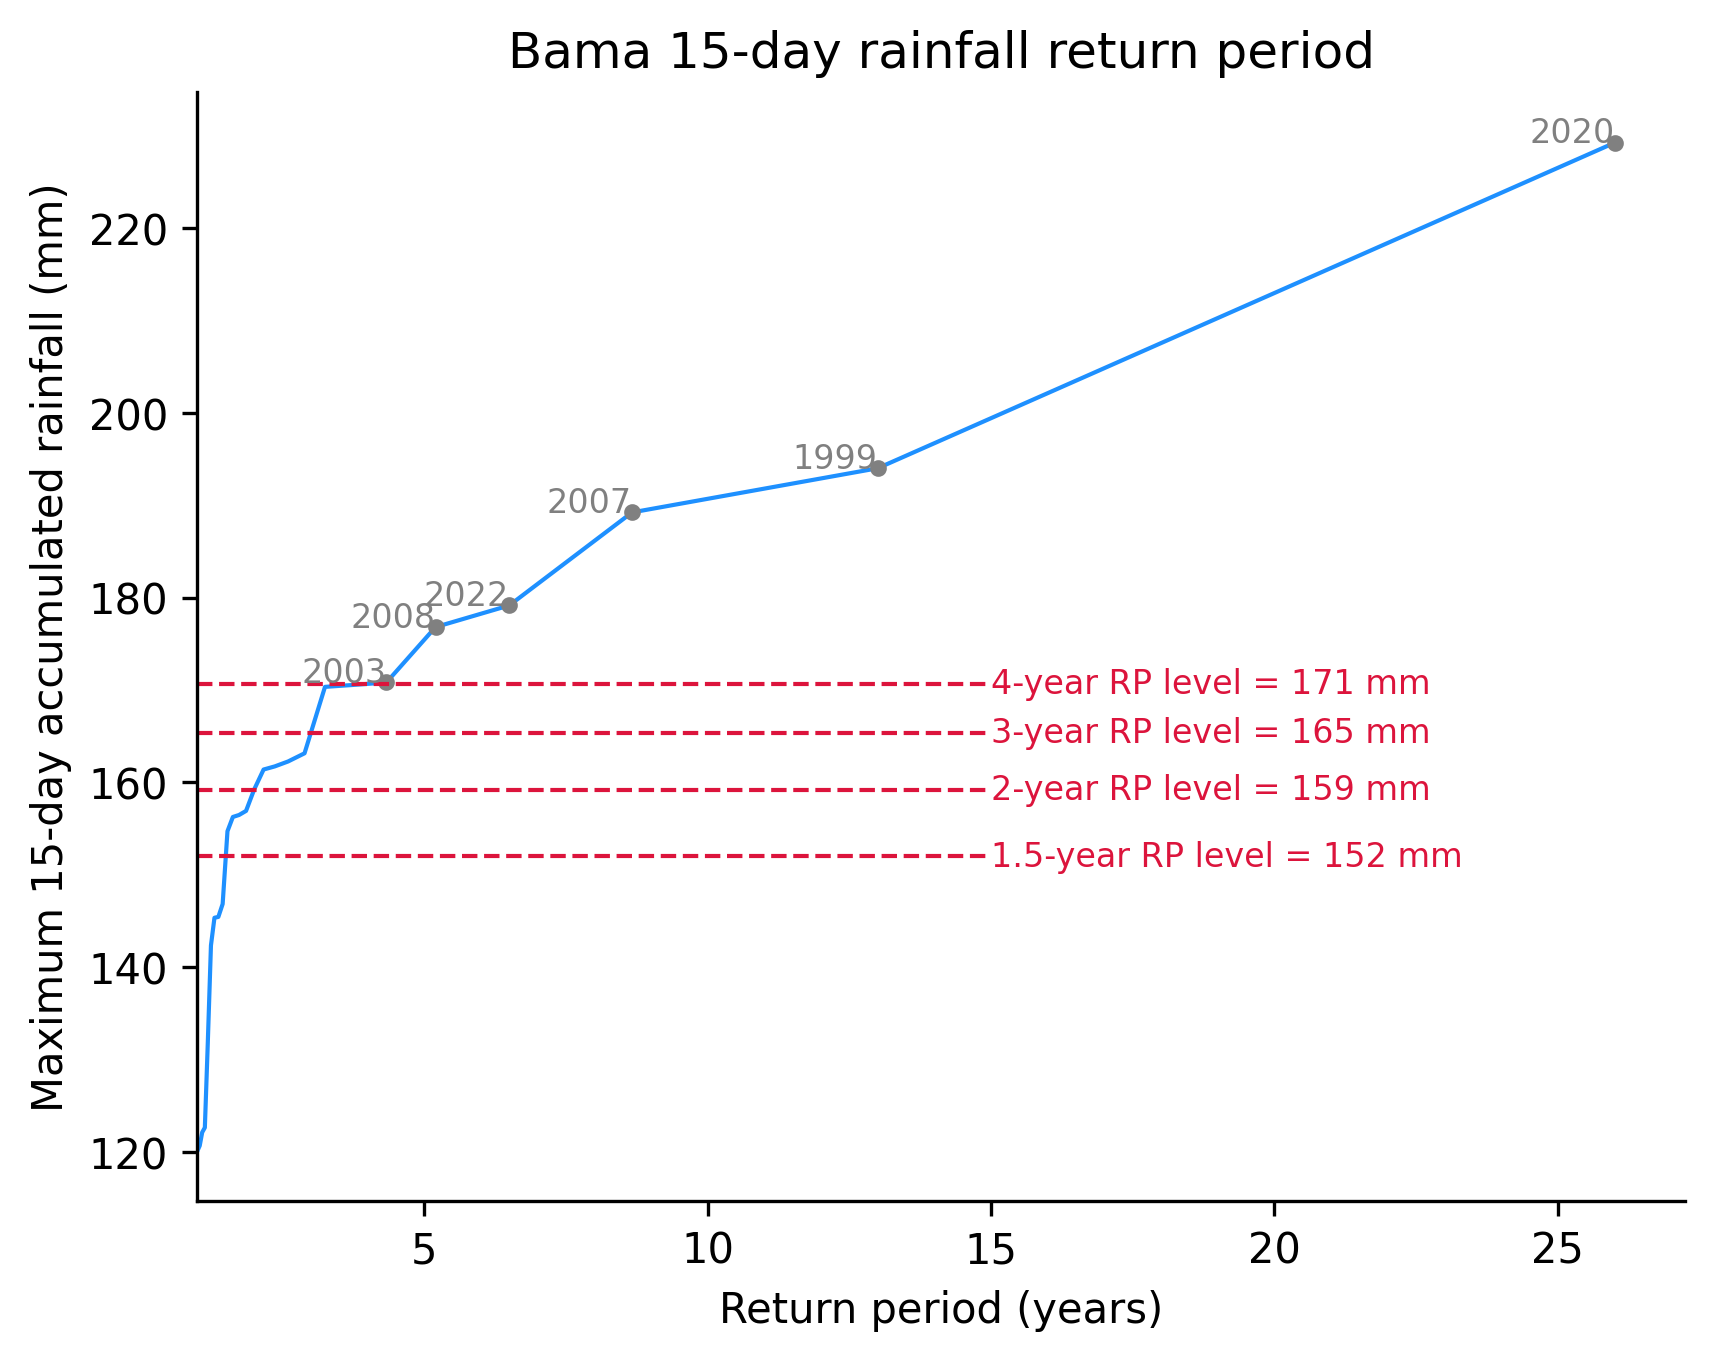

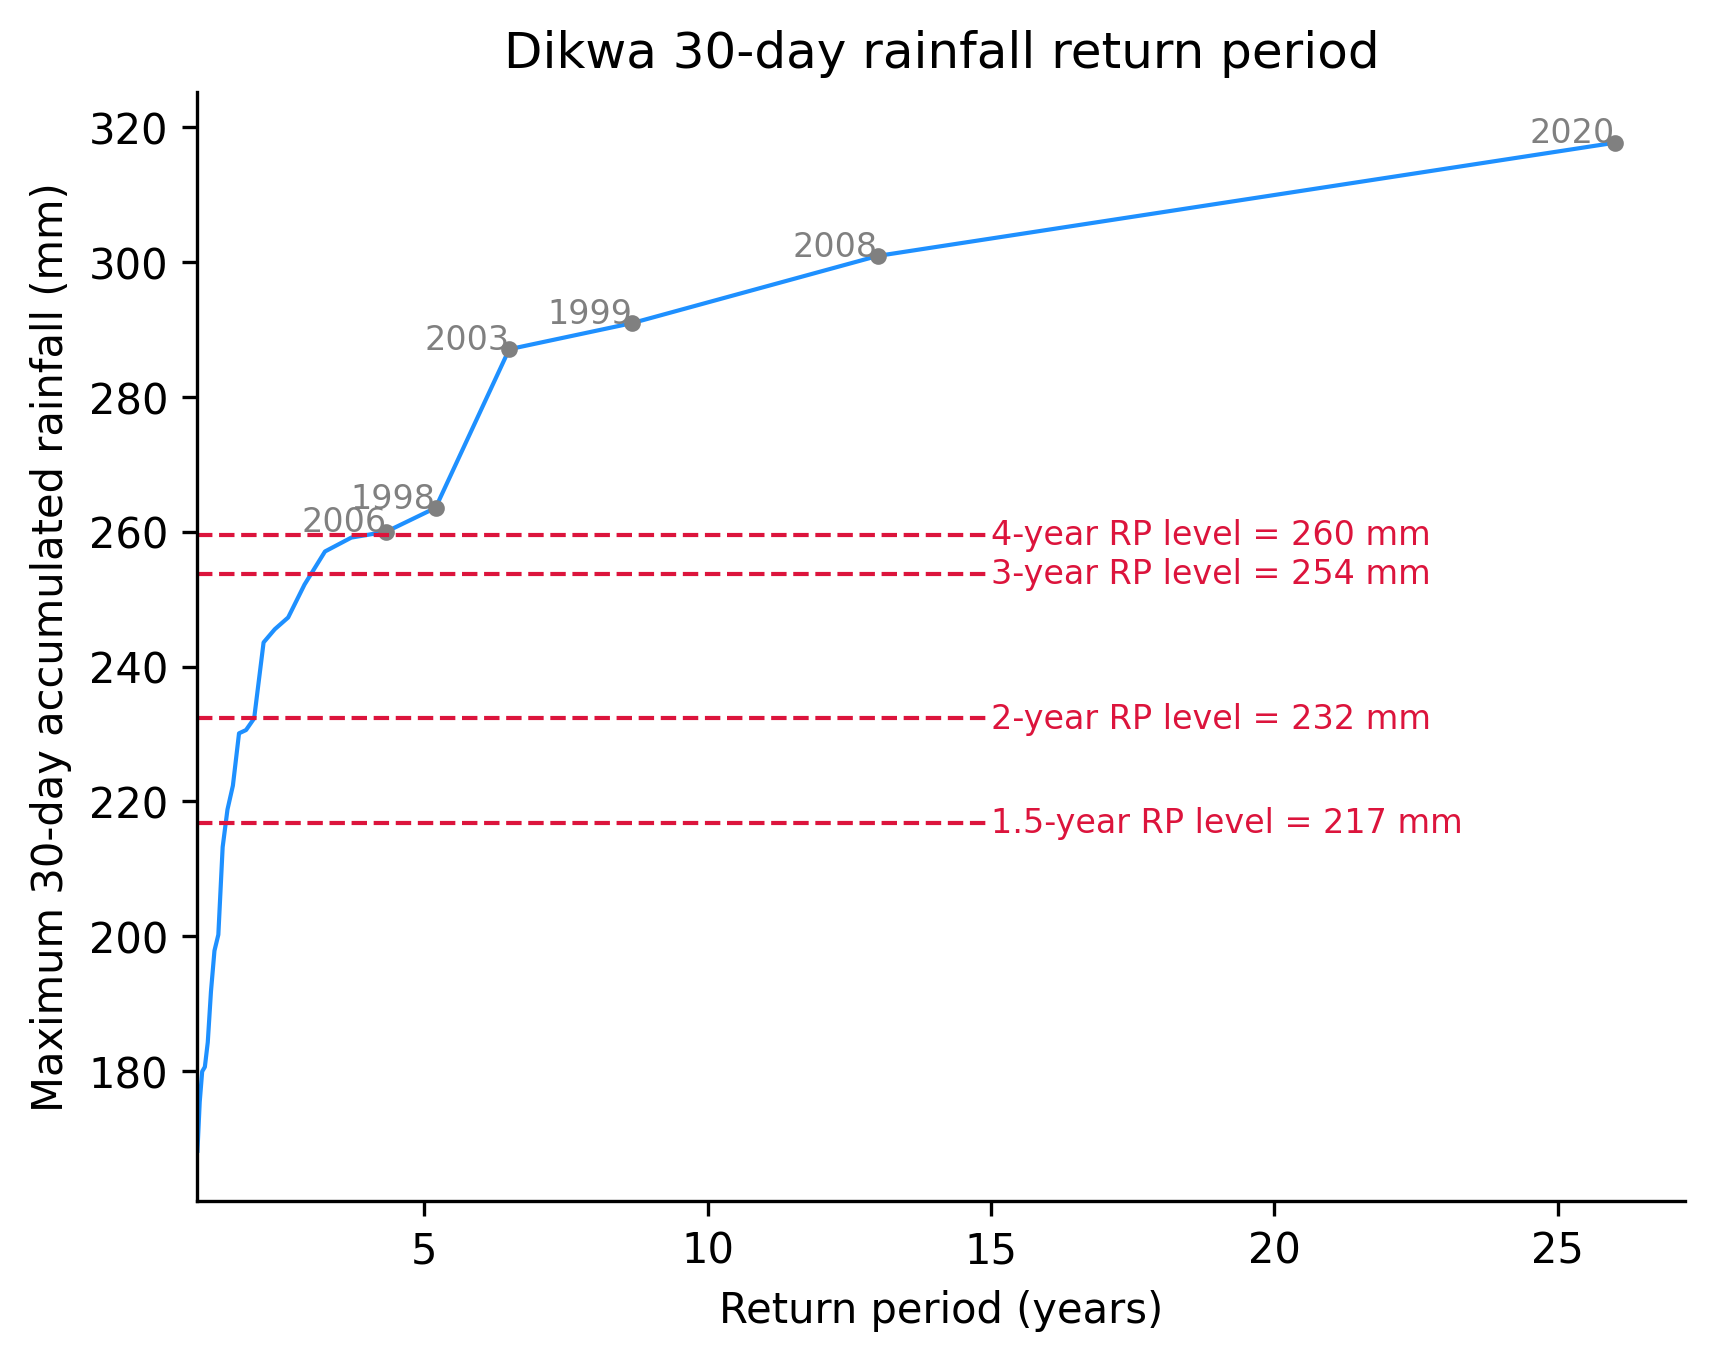

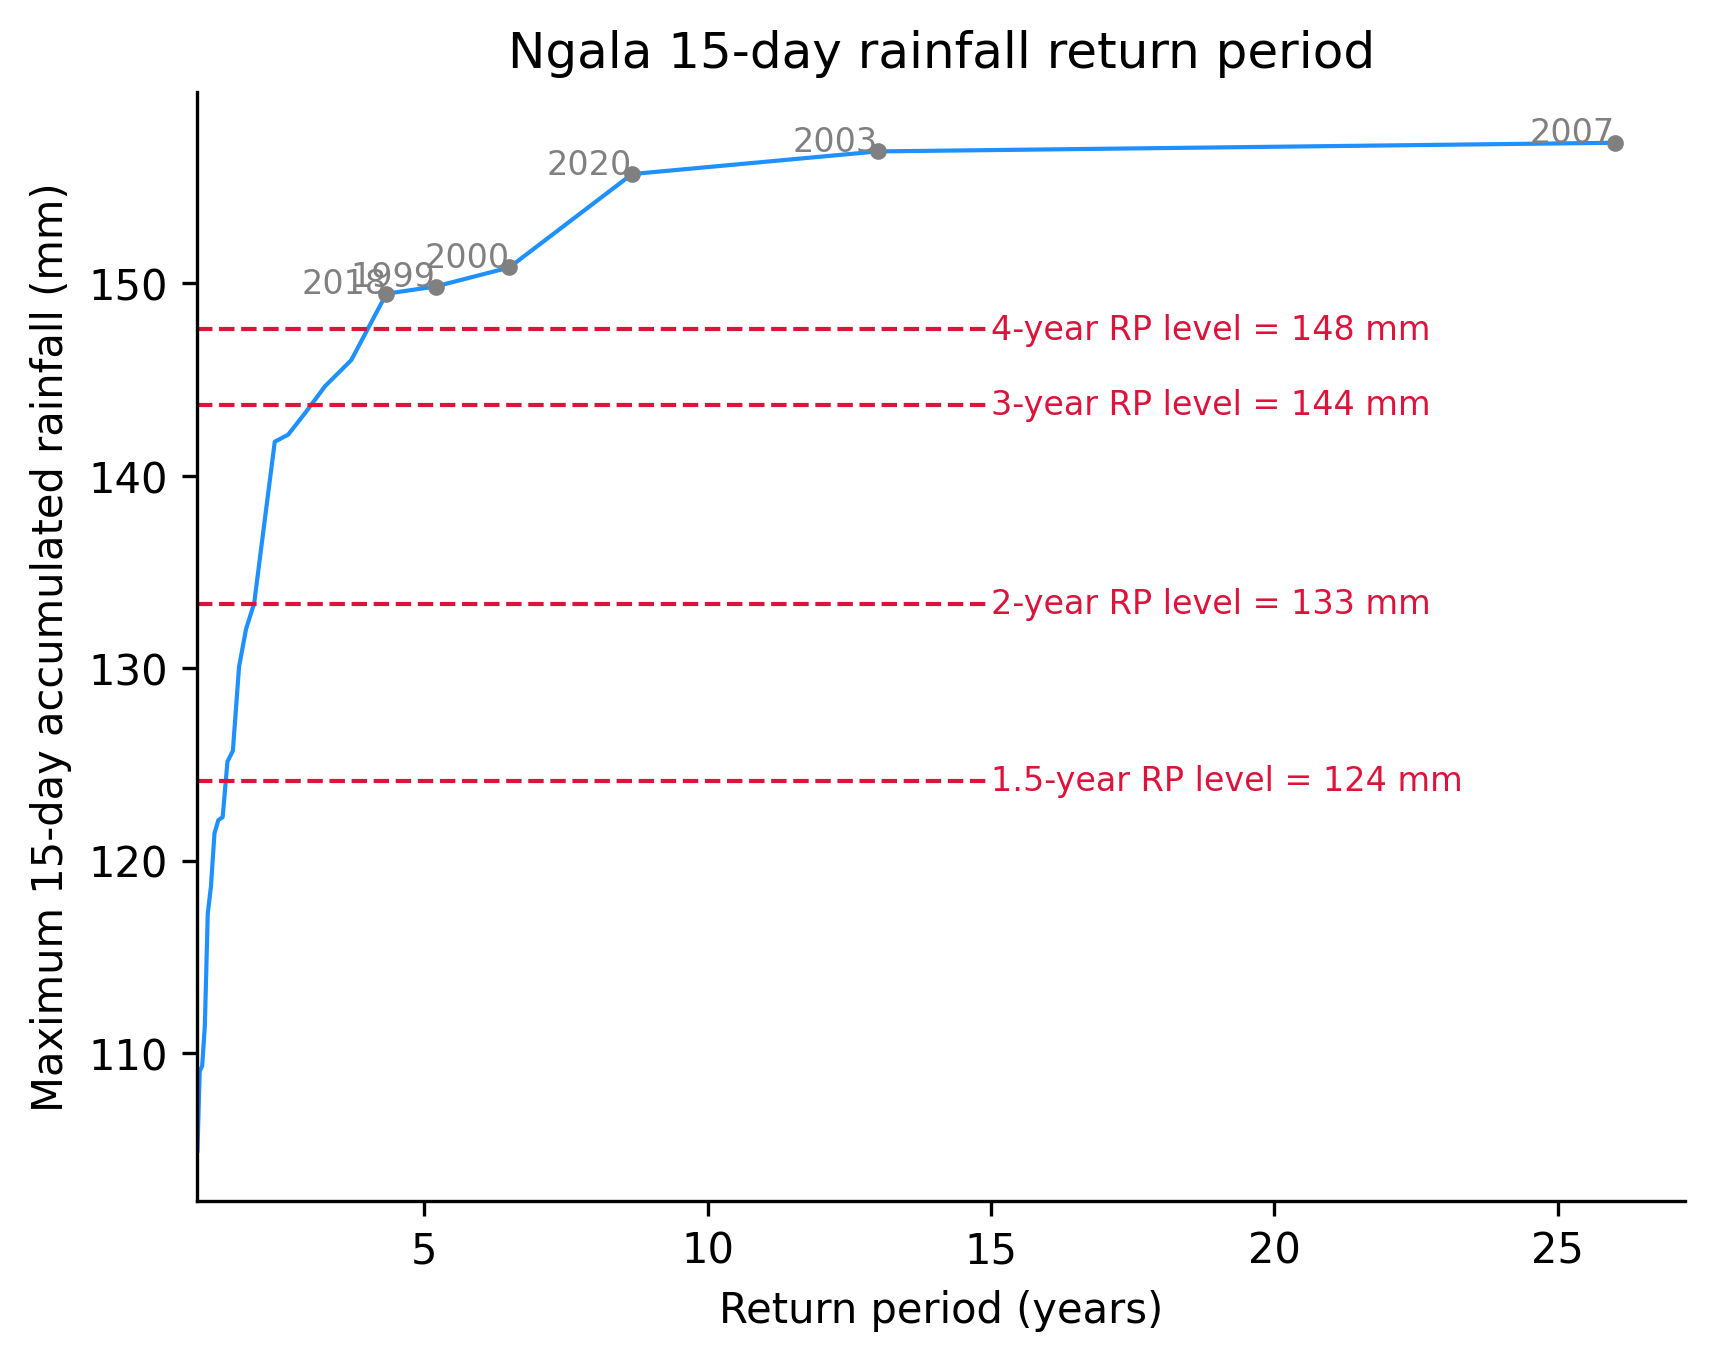

In [303]:
n_dayss = [15, 30, 15]

for pcode, n_days in zip(ADM2_PCODES, n_dayss):
    ch_f = ch[ch["ADM2_PCODE"] == pcode]
    ch_year = (
        ch_f.groupby(ch["time"].dt.year)[f"ch_roll{n_days}"]
        .max()
        .reset_index()
    )
    ch_year["rank"] = ch_year[f"ch_roll{n_days}"].rank()
    ch_year["rp"] = len(ch_year) / (len(ch_year) - ch_year["rank"] + 1)
    ch_year = ch_year.sort_values("rp", ascending=True)

    adm_name = adm.groupby("ADM2_PCODE").first().loc[pcode, "ADM2_EN"]

    fig, ax = plt.subplots(dpi=300)
    ch_year.plot(
        x="rp",
        y=f"ch_roll{n_days}",
        ax=ax,
        legend=False,
        linewidth=1,
        color="dodgerblue",
    )

    for year in ch_year.iloc[-6:]["time"]:
        x, y = ch_year.set_index("time").loc[year][["rp", f"ch_roll{n_days}"]]
        ax.plot(
            x,
            y,
            marker=".",
            color="grey",
        )
        ax.annotate(year, (x, y), ha="right", color="grey", fontsize=8)

    annotation_x = 15

    for rp in [1.5, 2, 3, 4]:
        y = np.interp(
            rp,
            ch_year["rp"],
            ch_year[f"ch_roll{n_days}"],
        )
        ax.plot(
            [1, annotation_x],
            [y, y],
            color="crimson",
            linestyle="--",
            linewidth=1,
        )
        ax.annotate(
            f"{rp}-year RP level = {y:.0f} mm",
            (annotation_x, y),
            fontsize=8,
            color="crimson",
            va="center",
        )

    ax.set_xlabel("Return period (years)")
    ax.set_ylabel(f"Maximum {n_days}-day accumulated rainfall (mm)")
    ax.set_xlim(left=1)
    ax.set_title(f"{adm_name} {n_days}-day rainfall return period")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    rp = 3
    thresh = np.interp(
        rp,
        ch_year["rp"],
        ch_year[f"ch_roll{n_days}"],
    )
    print(thresh)
    ch_trig = ch_f[ch_f[f"ch_roll{n_days}"] >= thresh]
    print(adm_name)
    display(
        ch_trig.groupby(ch_trig["time"].dt.year)["time"]
        .min()
        .rename("Trigger Date")
        .reset_index()
        .rename(columns={"time": "Year"})
    )

In [217]:
ch_seasonal = (
    ch.groupby(["ADM2_PCODE", ch["time"].dt.dayofyear])
    .mean()
    .drop(columns="time")
    .reset_index()
    .rename(columns={"time": "dayofyear"})
)
ch_seasonal["date_2000"] = pd.Timestamp("2000-01-01") + pd.to_timedelta(
    ch_seasonal["dayofyear"] - 1, unit="d"
)

## Compare with flood extent

In [269]:
compare = fs.merge(ch, on=["ADM2_PCODE", "time"])
compare_seasonal = (
    compare.groupby(["ADM2_PCODE", compare["time"].dt.dayofyear])
    .mean()
    .drop(columns="time")
    .reset_index()
    .rename(columns={"time": "dayofyear"})
)
compare_seasonal["date_2000"] = pd.Timestamp("2000-01-01") + pd.to_timedelta(
    compare_seasonal["dayofyear"] - 1, unit="d"
)

In [270]:
fs_roll = 7

corr = compare.groupby("ADM2_PCODE").corr()
corr = (
    corr[[x for x in corr.columns if "fs_roll" in x]]
    .reset_index()
    .rename(columns={"level_1": "ch_roll"})
)
corr = corr[corr["ch_roll"].str.contains("ch_roll")]
corr = corr.melt(
    id_vars=["ADM2_PCODE", "ch_roll"],
    value_vars=[x for x in corr.columns if "fs_roll" in x],
    value_name="corr",
    var_name="fs_roll",
)
corr["ch_roll"] = corr["ch_roll"].str.removeprefix("ch_roll").astype(int)
corr["fs_roll"] = corr["fs_roll"].str.removeprefix("fs_roll").astype(int)
corr = corr[corr["fs_roll"] == fs_roll]

ch_roll_max = 30
corr_max = corr.loc[
    corr[corr["ch_roll"] <= ch_roll_max].groupby("ADM2_PCODE")["corr"].idxmax()
]
corr_max = corr_max.sort_values("corr", ascending=False)

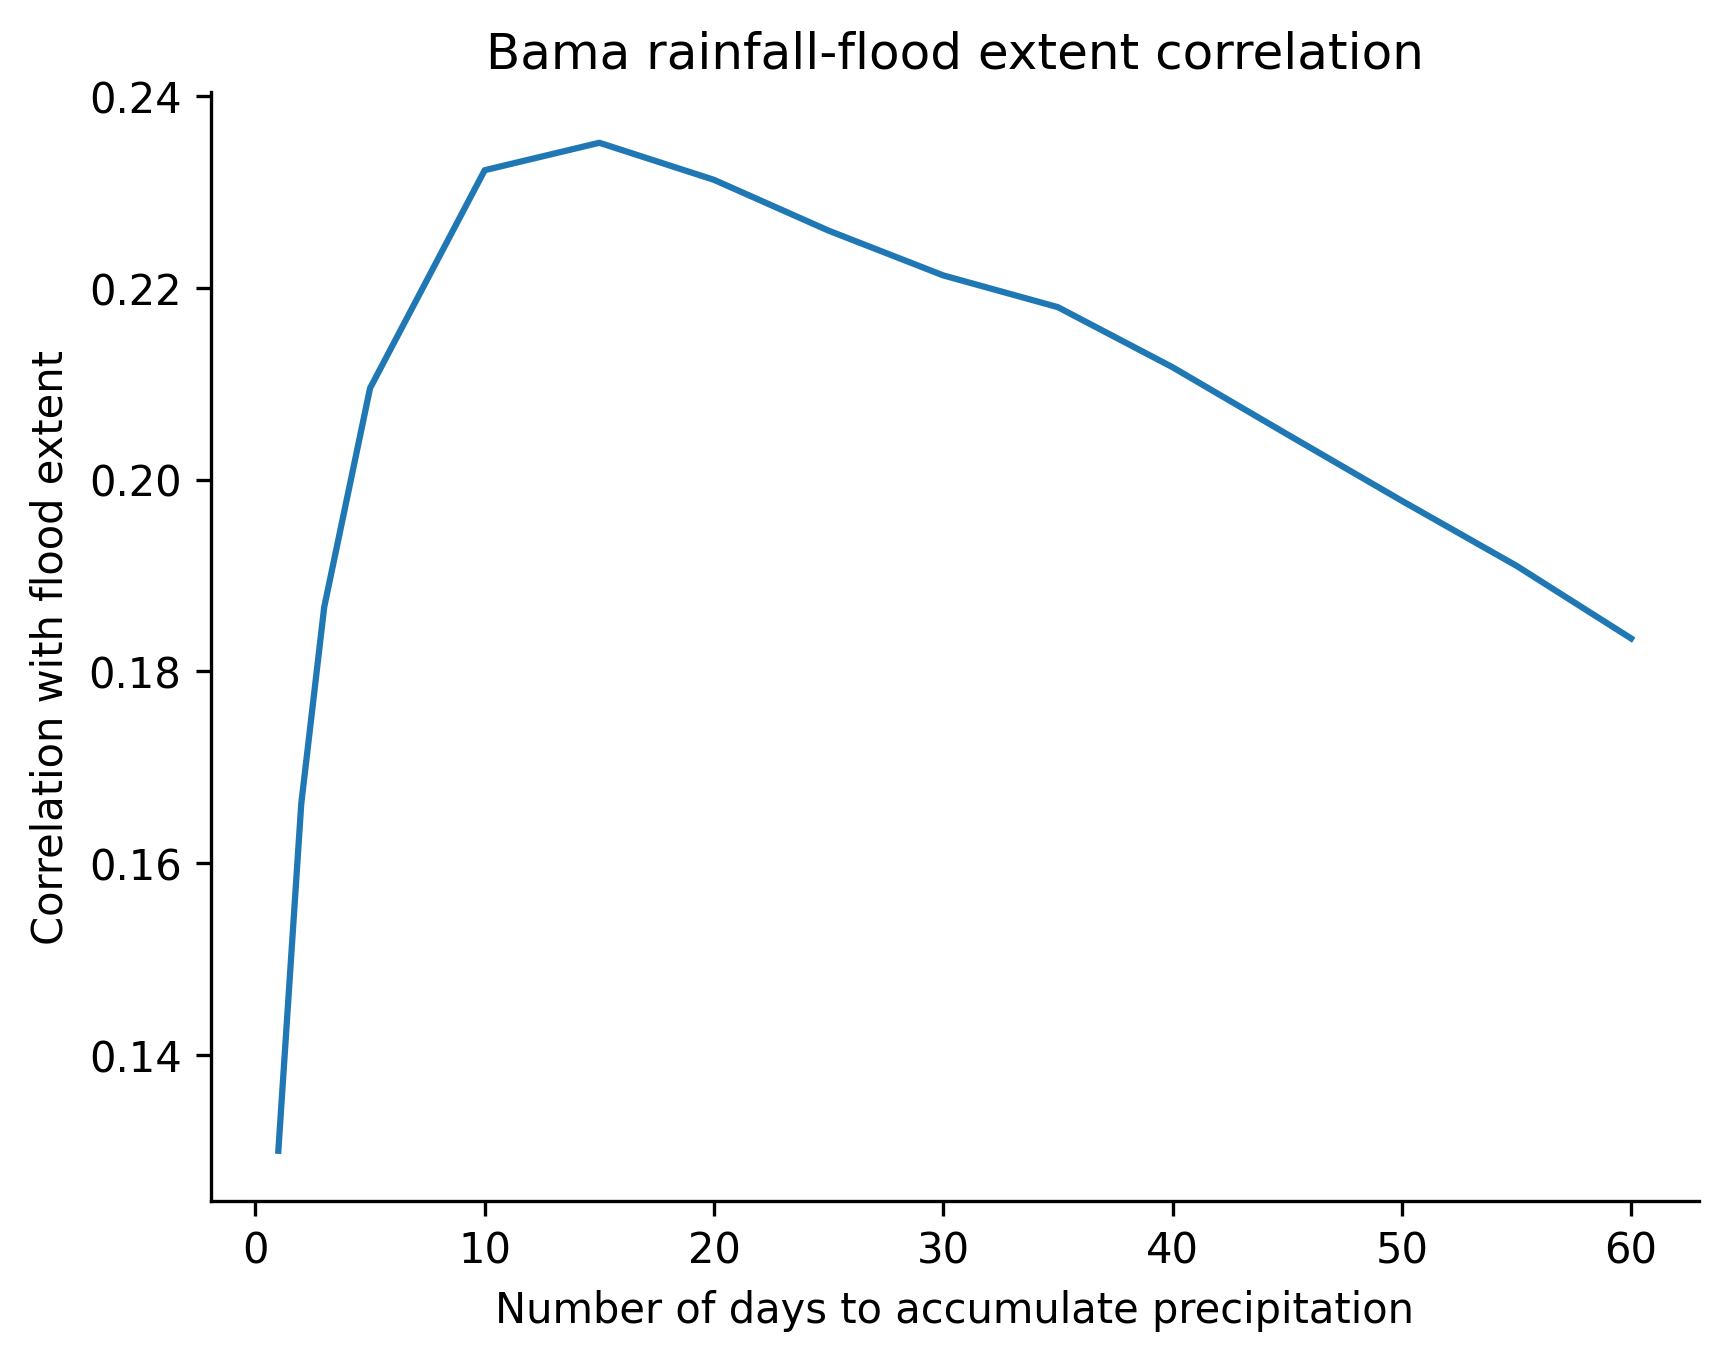

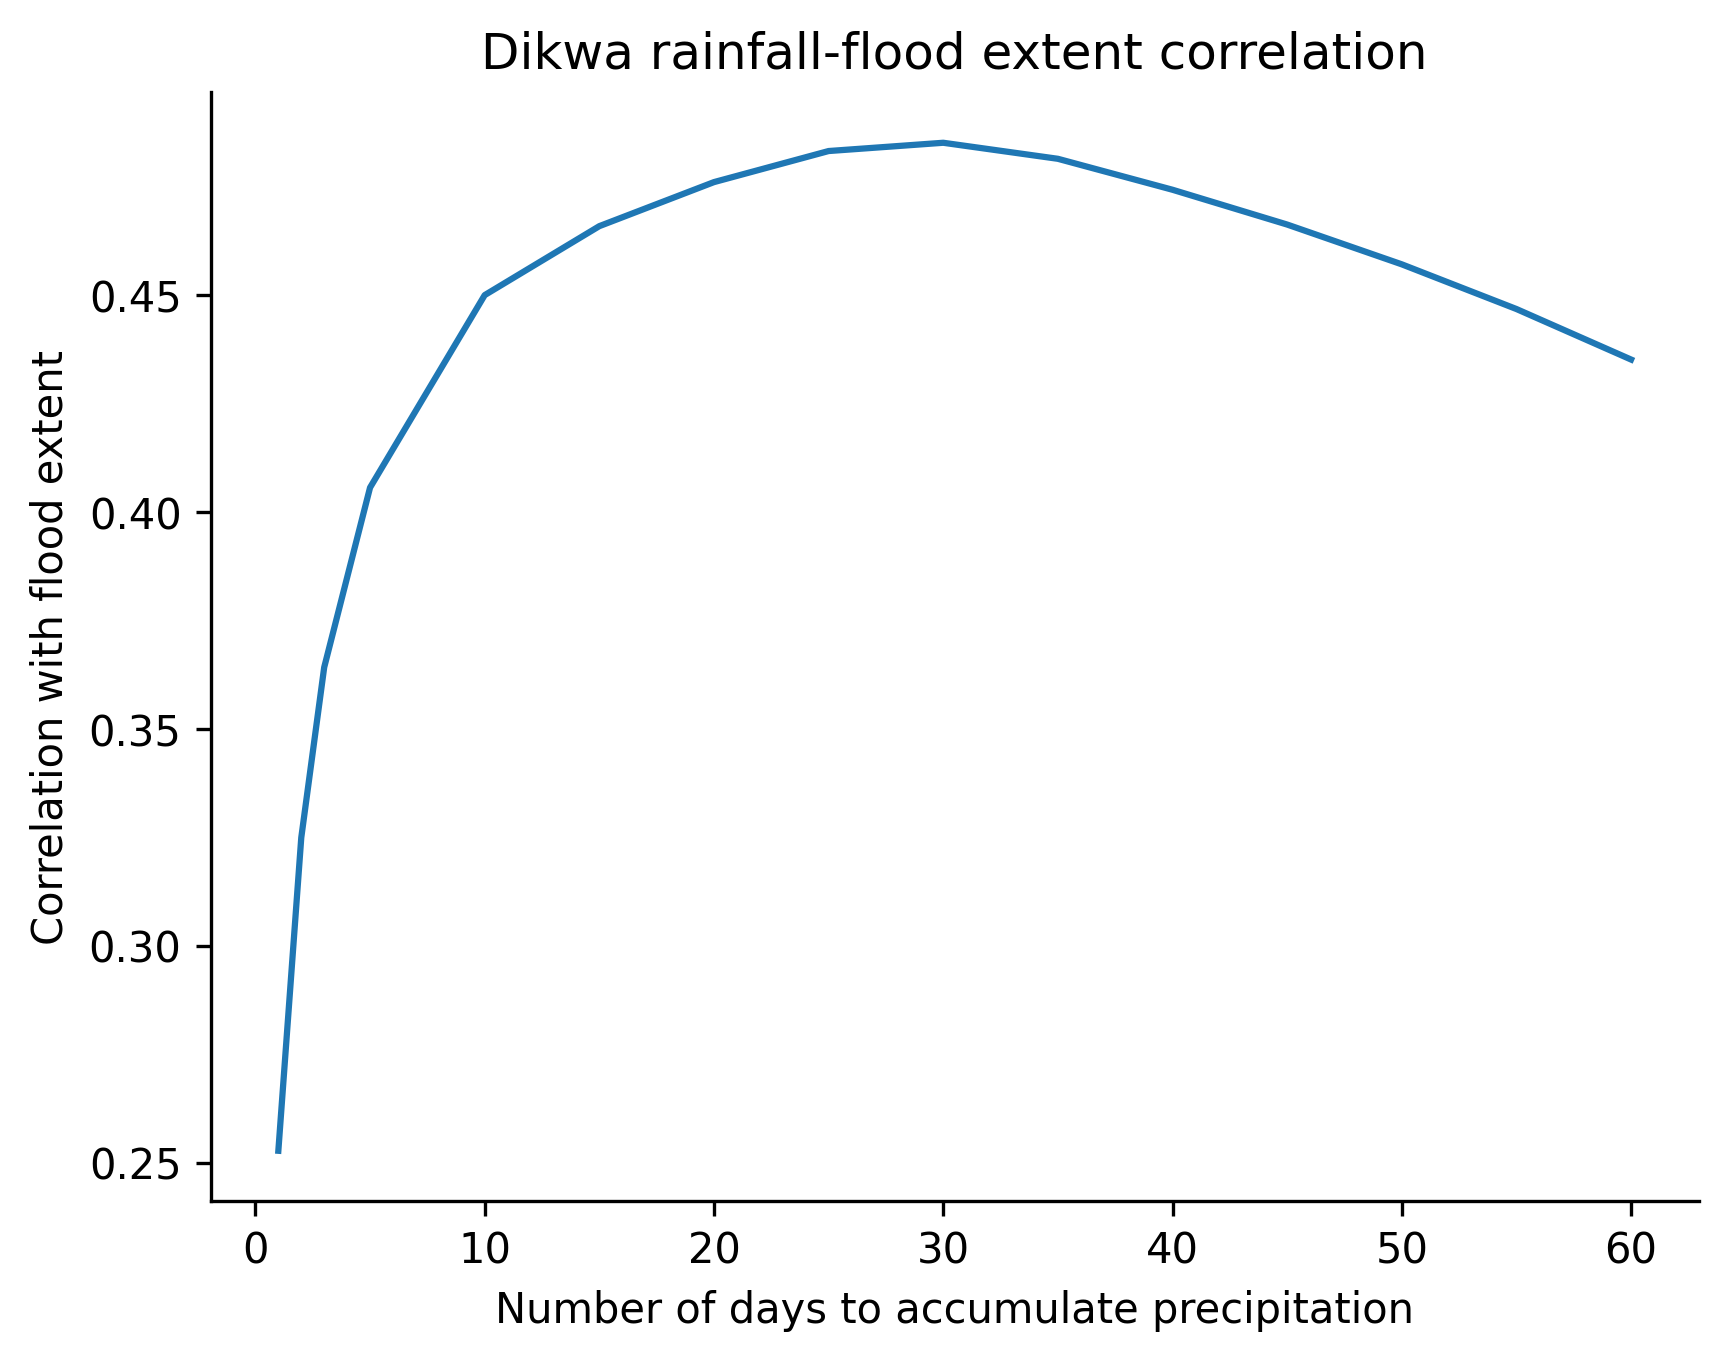

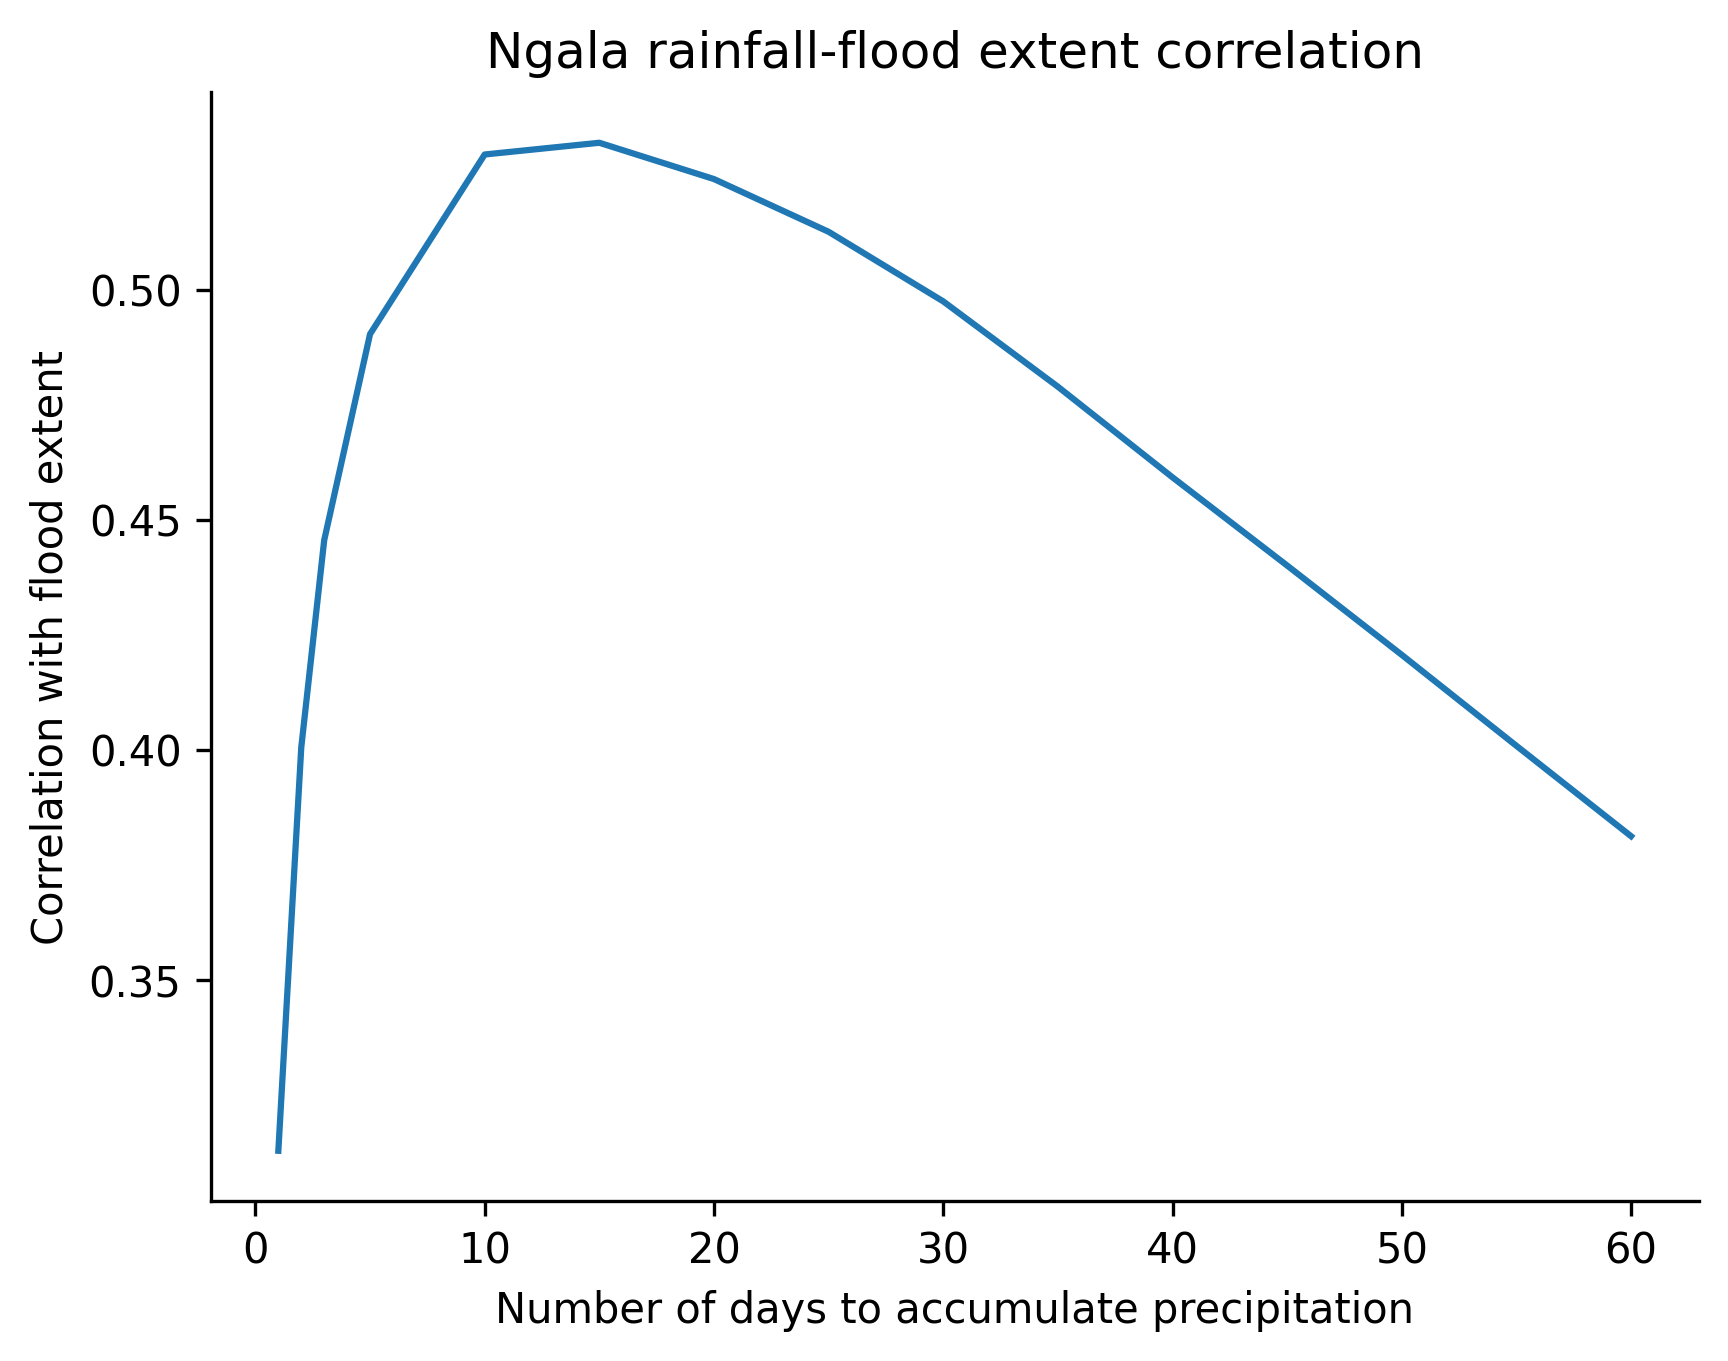

In [271]:
for pcode in ADM2_PCODES:
    adm_name = adm.groupby("ADM2_PCODE").first().loc[pcode, "ADM2_EN"]
    fig, ax = plt.subplots(dpi=300)
    corr[corr["ADM2_PCODE"] == pcode].plot(
        x="ch_roll", y="corr", ax=ax, legend=False
    )
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel("Number of days to accumulate precipitation")
    ax.set_ylabel("Correlation with flood extent")
    ax.set_title(f"{adm_name} rainfall-flood extent correlation")

In [272]:
corr

,ADM2_PCODE,ch_roll,fs_roll,corr
135,NG008003,1,7,0.130001
136,NG008003,2,7,0.166211
137,NG008003,3,7,0.186705
138,NG008003,5,7,0.209545
139,NG008003,10,7,0.232284
140,NG008003,15,7,0.235146
141,NG008003,20,7,0.231281
142,NG008003,25,7,0.225980
143,NG008003,30,7,0.221311
144,NG008003,35,7,0.217999


In [249]:
corr.loc[corr["corr"].idxmax()]

ADM2_PCODE    NG008008
ch_roll             30
fs_roll              7
corr          0.485204
Name: 113, dtype: object